<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-II/blob/main/ML2_CNN_BrainTumourMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

# Libraries

In [10]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

# Getting the Dataset

In [2]:
!kaggle datasets download -d arifmia/brain-tumor-mri-image-dataset-updated

Dataset URL: https://www.kaggle.com/datasets/arifmia/brain-tumor-mri-image-dataset-updated
License(s): apache-2.0
 82% 71.0M/86.9M [00:00<00:00, 94.3MB/s]
100% 86.9M/86.9M [00:00<00:00, 91.4MB/s]


In [3]:
!unzip brain-tumor-mri-image-dataset-updated.zip

Archive:  brain-tumor-mri-image-dataset-updated.zip
  inflating: image_dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(20).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image

In [4]:
!ls image_dataset # list folders within the dataset

Testing  Training


In [5]:
!ls image_dataset/Training # list folders within the training folder

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [6]:
!ls image_dataset/Testing # list folders within the testing folder

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [9]:
# Check for the total number of files per subfolder
import os
glioma_tumor = len(os.listdir('image_dataset/Testing/glioma_tumor'))
meningioma_tumor = len(os.listdir('image_dataset/Testing/meningioma_tumor'))
no_tumor = len(os.listdir('image_dataset/Testing/no_tumor'))
pituitary_tumor = len(os.listdir('image_dataset/Testing/pituitary_tumor'))

gliomaTumor = len(os.listdir('image_dataset/Training/glioma_tumor'))
meningiomaTumor = len(os.listdir('image_dataset/Training/meningioma_tumor'))
noTumor = len(os.listdir('image_dataset/Training/no_tumor'))
pituitaryTumor = len(os.listdir('image_dataset/Training/pituitary_tumor'))

print(f"Testing Subfolders Files : Glioma tumor {glioma_tumor},  Meningioma tumor {meningioma_tumor},	No Tumor {no_tumor},  Pituitary tumor {pituitary_tumor}")
print(f"Training Subfolders Files : Glioma tumor {gliomaTumor},  Meningioma tumor {meningiomaTumor},	No Tumor {noTumor},  Pituitary tumor {pituitaryTumor}")

Testing Subfolders Files : Glioma tumor 100,  Meningioma tumor 115,	No Tumor 105,  Pituitary tumor 74
Training Subfolders Files : Glioma tumor 826,  Meningioma tumor 822,	No Tumor 395,  Pituitary tumor 827


In [15]:
import os
import random

# Function to randomly select and display an image from the specified folder
def display_random_image(folder_path, target_class):
    # Map of target classes to subfolder names
    subfolders = {
        "glioma_tumor": "glioma_tumor",
        "meningioma_tumor": "meningioma_tumor",
        "no_tumor": "no_tumor",
        "pituitary_tumor": "pituitary_tumor"
    }

    # Ensure the target class exists in the dataset
    if target_class not in subfolders:
        print(f"Invalid target class: {target_class}. Available classes: {list(subfolders.keys())}")
        return

    # Construct the folder path
    full_path = os.path.join(folder_path, subfolders[target_class])

    # Check if the folder exists and has images
    if not os.path.exists(full_path) or len(os.listdir(full_path)) == 0:
        print(f"No images found in folder: {full_path}")
        return

    # Randomly select an image
    image_name = random.choice(os.listdir(full_path))
    image_path = os.path.join(full_path, image_name)

    # Display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

    print(f'Image shape: {img.shape}')

    plt.title(f"Class: {target_class} | File: {image_name}")
    plt.show()


Image shape: (236, 236, 3)


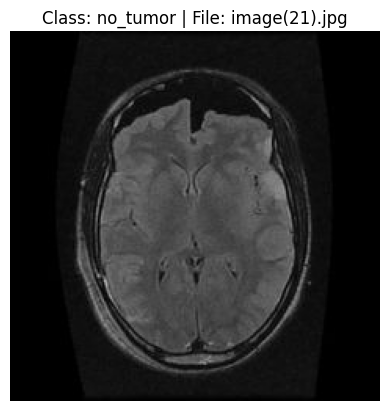

In [16]:
dataset_path = "image_dataset/Testing" # Path to the dataset
# Specify the target class (e.g., 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor')
target_class = "no_tumor"  # Change this to any target class you want
display_random_image(dataset_path, target_class) # Display a random image from the specified class and folder


Image shape: (512, 512, 3)


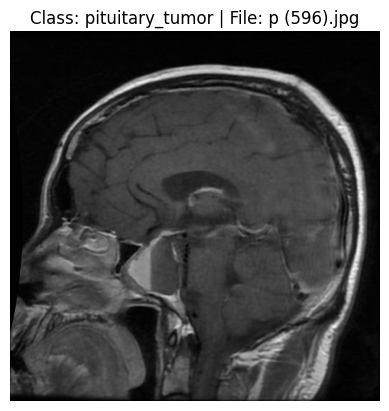

In [14]:
dataset_path = "image_dataset/Training" # Path to the dataset
# Specify the target class (e.g., 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor')
target_class = "pituitary_tumor"  # Change this to any target class you want
display_random_image(dataset_path, target_class) # Display a random image from the specified class and folder


# Splitting the Dataset into Training and Testing folders

The data (images) are already split(contained) in separate Training and Testing subfolders

In [17]:
import os

# Define the dataset paths
train_dir = "image_dataset/Training"
test_dir = "image_dataset/Testing"

# Count the number of files in each subfolder
def count_files_in_subfolders(directory):
    total_files = 0
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):
            num_files = len(os.listdir(subfolder_path))
            total_files += num_files
            print(f"Subfolder '{subfolder}': {num_files} files")
    return total_files

# Count files in Training and Testing datasets
print("Training Dataset:")
total_train_files = count_files_in_subfolders(train_dir)
print(f"Total training files: {total_train_files}")

print("\nTesting Dataset:")
total_test_files = count_files_in_subfolders(test_dir)
print(f"Total testing files: {total_test_files}")


Training Dataset:
Subfolder 'pituitary_tumor': 827 files
Subfolder 'meningioma_tumor': 822 files
Subfolder 'glioma_tumor': 826 files
Subfolder 'no_tumor': 395 files
Total training files: 2870

Testing Dataset:
Subfolder 'pituitary_tumor': 74 files
Subfolder 'meningioma_tumor': 115 files
Subfolder 'glioma_tumor': 100 files
Subfolder 'no_tumor': 105 files
Total testing files: 394


# Preprocessing

## Preprocessing Training Dataset

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest"  # Fill in missing pixels
)

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical'  # Use categorical labels
)

Found 2870 images belonging to 4 classes.


## Original Images vs Augmented Equivalents

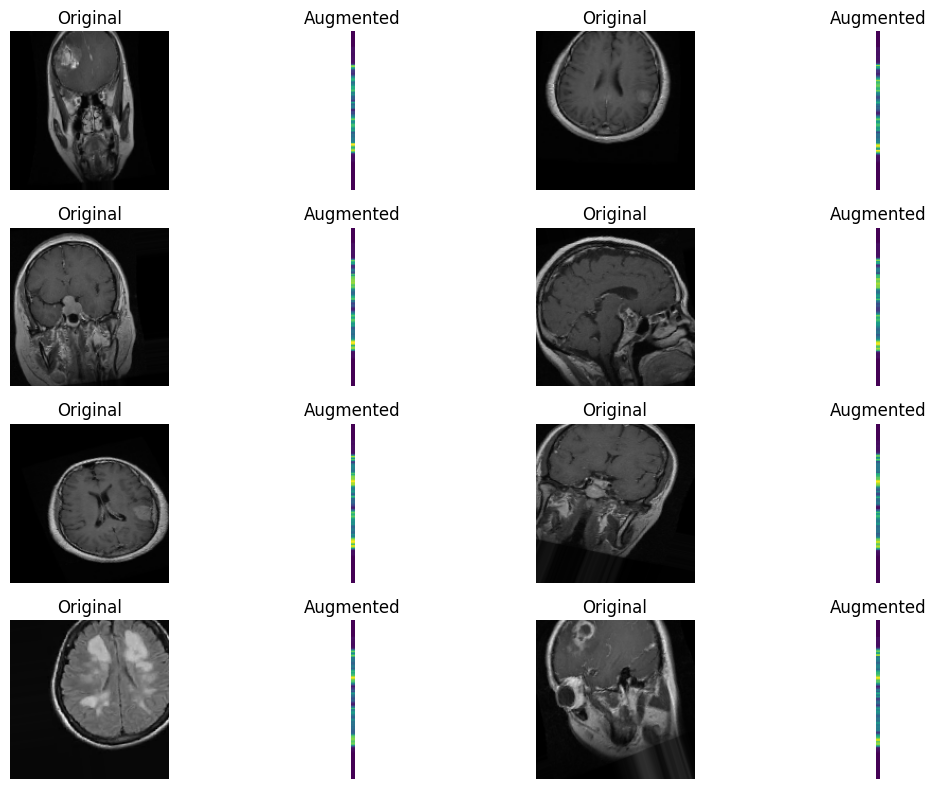

In [21]:
import matplotlib.pyplot as plt

# Function to plot original and augmented images
def plot_augmented_images(generator):
    # Fetch a batch of images and labels
    images, labels = next(generator)

    # Apply augmentation to the fetched batch
    augmented_images = train_datagen.flow(images, batch_size=images.shape[0]).__next__()[0]

    plt.figure(figsize=(12, 8))
    for i in range(8):  # Display 8 images for comparison
        # Original image
        plt.subplot(4, 4, 2 * i + 1)
        plt.imshow(images[i])
        plt.title("Original")
        plt.axis("off")

        # Augmented image
        plt.subplot(4, 4, 2 * i + 2)
        plt.imshow(augmented_images[i])
        plt.title("Augmented")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Display the images
plot_augmented_images(train_generator)


## Preprocessing Testing Dataset

In [22]:
# Preprocessing for testing data (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical'  # Use categorical labels
)


Found 394 images belonging to 4 classes.


# Modeling (Building a CNN(Convolution Neural Network))

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [24]:
# Define the CNN architecture
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Input shape matches preprocessed images
    MaxPooling2D(pool_size=(2, 2)),  # Downsampling with a 2x2 pool

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening Layer
    Flatten(),

    # Fully Connected Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization with dropout

    # Output Layer
    Dense(4, activation='softmax')  # 4 classes in the dataset
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
    metrics=['accuracy']
)

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluation

In [25]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.3217 - loss: 1.3373 - val_accuracy: 0.2370 - val_loss: 1.6240
Epoch 2/10
 1/89 ━━━━━━━━━━━━━━━━━━━━ 1:56 1s/step - accuracy: 0.4062 - loss: 1.2091

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4062 - loss: 1.2091 - val_accuracy: 0.3000 - val_loss: 1.5939
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.4245 - loss: 1.2253 - val_accuracy: 0.3542 - val_loss: 2.3346
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4688 - loss: 1.0933 - val_accuracy: 0.3000 - val_loss: 2.6233
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.5008 - loss: 1.0942 - val_accuracy: 0.3464 - val_loss: 2.8581
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 0.8423 - val_accuracy: 0.2000 - val_loss: 2.9181
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.5675 - loss: 0.9855 - val_accuracy: 0.3385 - val_loss: 2.2306
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5938 - loss: 1.0420 - val_accuracy: 0.3000 - val_loss: 2.8420
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6058 - loss: 0.9123 - val_accuracy: 0.3073 - val_loss: 3.30

ACCURACY & LOSS EVALUATION GRAPHS

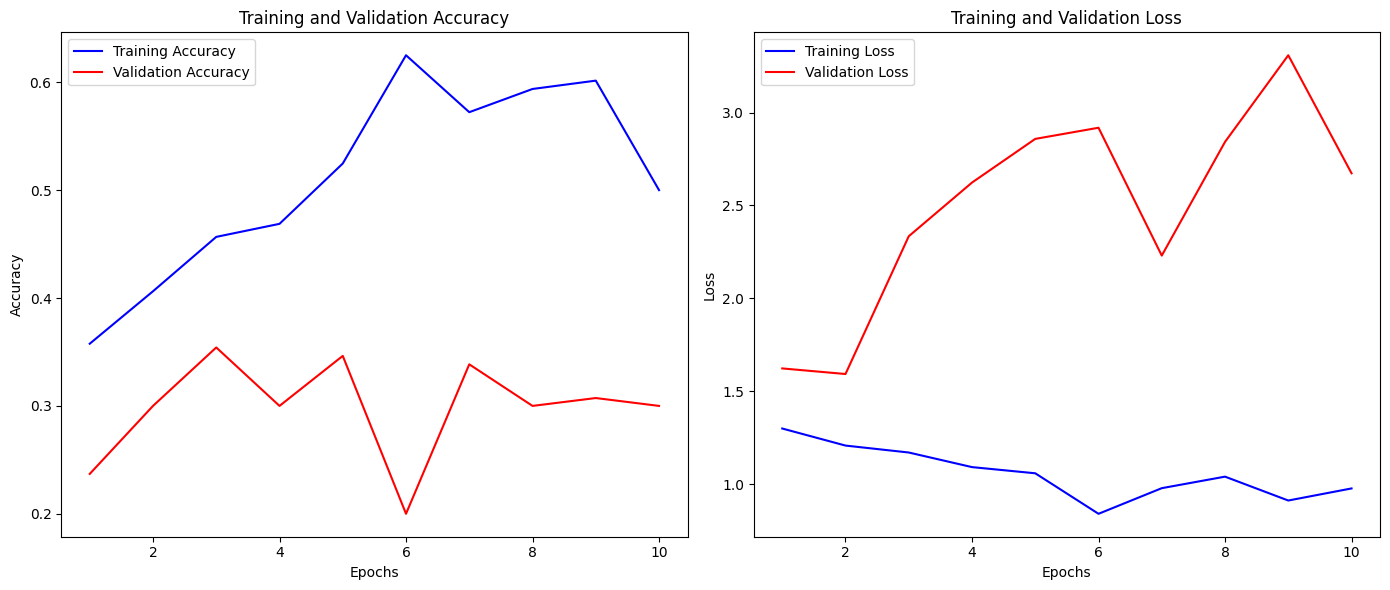

In [26]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_accuracy_and_loss(history):
    # Extract values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function after training
plot_accuracy_and_loss(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 754ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.09      0.02      0.03       100
meningioma_tumor       0.29      0.02      0.03       115
        no_tumor       0.26      0.88      0.41       105
 pituitary_tumor       0.19      0.04      0.07        74

        accuracy                           0.25       394
       macro avg       0.21      0.24      0.13       394
    weighted avg       0.21      0.25      0.14       394



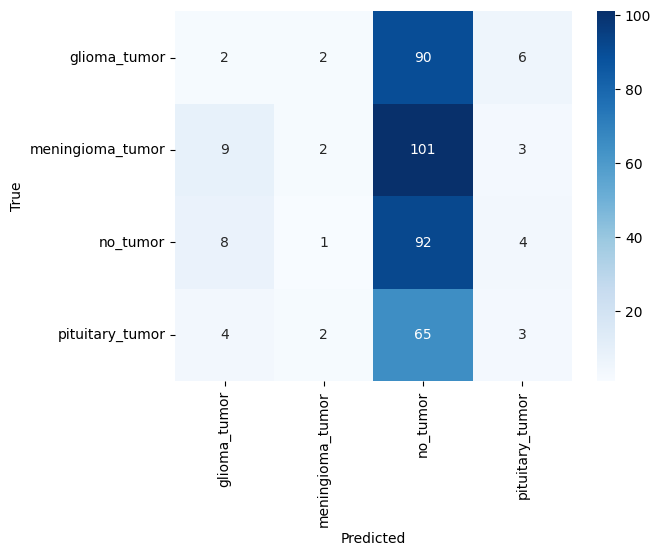

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [29]:
# Save the model in TensorFlow's SavedModel format
#model.save('brain_tumor_model')

# OR save the model in HDF5 format (optional, for compatibility)
model.save('brain_tumor_model.h5')

In [30]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('brain_tumor_model.h5')

# Test the loaded model
predictions = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 567ms/step


## Export the Model for Deployment

## Flask Web Deployment

In [34]:
!pip install flask

Create a Flask application app.py

In [35]:
from flask import Flask, request, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

app = Flask(__name__)

# Load the model
model = load_model('brain_tumor_model.h5')

# Define target class names
class_names = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return "No file uploaded!"

    file = request.files['file']
    if file.filename == '':
        return "No file selected!"

    # Preprocess the image
    img = load_img(file, target_size=(150, 150))  # Resize to match model input
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    return f"Prediction: {predicted_class}"

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Create a HTML Front-end

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Brain Tumor Classifier</title>
</head>
<body>
    <h1>Upload an Image</h1>
    <form action="/predict" method="post" enctype="multipart/form-data">
        <input type="file" name="file" />
        <button type="submit">Predict</button>
    </form>
</body>
</html>


Run the app

Access the application at http://127.0.0.1:5000/.

In [ ]:
python app.py

**Cloud Deployment**

Host the application on cloud platforms like:

- Heroku: For simple deployment.
- AWS, GCP, or Azure: For more scalable deployment.
- Streamlit: For an easy-to-build interactive UI.